0.99
0.9800303886592173
0.9626951163666054
0.9332670914296738
0.8852832114985489
0.8119328338320613
0.7100801628673744
0.5857469522701353
0.45519102979761683
0.3371690808659118
0.2430197187774006
0.1741758323227134
0.126256859383661
0.09355735355673002
0.07124888858315997
0.05585757593945038
0.0450554907632941
0.037325388526790196
0.03168343033930341
0.027487122306918705
0.0243111670764678
0.02186928833045771
0.01996527419551835
0.018462156284521743
0.01726259091300473
0.016296194589413705
0.015511241463226532
0.0148691328627512
0.014340654231924429
0.013903401967113746
0.013539987566529415
0.01323676591408783
0.012982922072888191
0.012769806705673112
0.012590446219642457
0.012439177273552097
0.012311370890960191
0.012203221901392412
0.01211158655226482
0.012033856030713613
0.011967857038721108
0.011911772957071874
0.01186408083183819
0.011823500634487854
0.011788954127756155
0.011759531312956198
0.011734462908697136
0.011713097663643375
0.01169488357045827
0.01167935224817351
0.011666

<function matplotlib.pyplot.show(close=None, block=None)>

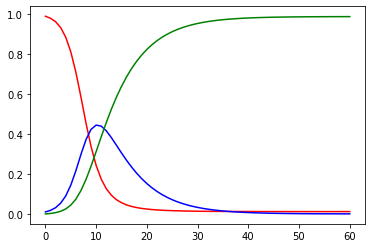

In [21]:
#trying 4th order Runge-Kutta method for SIR model
#author: Elaine Gorom

#susceptible ode for basic SIR model
def dsdt(t,s,i):
    return(-beta*s*i)

#infected ode for basic SIR model
def didt(t,s,i):
    return(beta*s*i-gamma*i)

#omitting function for recovered ode since it's not necessary to solve this system of odes

#cmain function for 4th order Runge-Kutta for SIR model
def RK4SIR(n,beta, gamma,s0,i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
   #need to add in a break if s0+i0+r0/=1

    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ii=I[i]
        print(Si)

        sk1=dsdt(i,Si,Ii)
        ik1=didt(i,Si,Ii)
        

        sk2=dsdt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
        ik2=didt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

        sk3=dsdt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
        ik3=didt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

        sk4=dsdt(i+dt,Si+dt*sk3,Ii+dt*ik3)
        ik4=didt(i+dt,Si+dt*sk3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]

    return S,I,R


n=60
beta=1.5
gamma=1/3
s0=.99
i0=.01
r0=0
dt=.5

s,i,r=RK4SIR(n,beta,gamma,s0,i0,r0,dt)

import numpy as np
import math
import matplotlib.pyplot as plt

t=list(range(0,n+1))
plt.figure
plt.plot(t,s,'r')
plt.plot(t,i,'b')
plt.plot(t,r,'g')
plt.show

# Susceptible function for with demography
def dsddt(t,s,i):
    return(mu-beta*s*i-mu*s)

#infected function for with demography
def diddt(t,s,i):
    return(beta*s*i-gamma*i-mu*i)


#susceptible function with latent period
def dsedt(t,s,i,e):
    return(-beta*s*i)

#exposed function with latent period
def deedt(t,s,i,e):
    return(beta*s*i-sigma*e)

#infected function with latent period
def diedt(t,s,i,e):
    return(sigma*e-gamma*i)


#susceptible function with latent period and demography
def dseddt(t,s,i,e):
    return(mu-(beta*i+mu)*s)

#exposed function with latent period and demography
def deeddt(t,s,i,e):
    return(beta*s*i-(mu+sigma)*e)

#infecte function with latent period and demography
def dieddt(t,s,i,e):
    return(sigma*e-(mu+gamma)*i)

  



    
